# 1. Support Vector Machines

## 1.1 Example Data Set 1

In [129]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize



#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex6\ex6\ex6data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [130]:
#Extracting the contents

# Training Set
X = mat_contents['X']
Y = mat_contents['y']

m,n = X.shape

print(X)
print(Y.shape)

[[1.9643   4.5957  ]
 [2.2753   3.8589  ]
 [2.9781   4.5651  ]
 [2.932    3.5519  ]
 [3.5772   2.856   ]
 [4.015    3.1937  ]
 [3.3814   3.4291  ]
 [3.9113   4.1761  ]
 [2.7822   4.0431  ]
 [2.5518   4.6162  ]
 [3.3698   3.9101  ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.2638   4.3706  ]
 [2.6555   3.5008  ]
 [3.1855   4.2888  ]
 [3.6579   3.8692  ]
 [3.9113   3.4291  ]
 [3.6002   3.1221  ]
 [3.0357   3.3165  ]
 [1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [1.9527   2.7843  ]
 [2.2753   2.7127  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [3.0473   2.2931  ]
 [2.4827   2.0373  ]
 [2.5057   2.3853  ]
 [1.8721   2.0577  ]
 [2.0103   2.3546  ]
 [1.2269   2.3239  ]
 [1.8951   2.9174  ]
 [1.561    3.0709  ]
 [1.5495   2.6923  ]
 [1.6878   2.4057  ]
 [1.4919   2.0271  ]
 [0.962    2.682   ]
 [1.1693   2.9276  ]
 [0.8122   2.9992  ]
 [0.9735   3.3881  ]
 [1.25     3.1937  ]
 [1.3191   3.5109  ]
 [2.2292   2.201   ]
 [2.4482   2.6411  ]
 [2.7938   1.9656  ]
 [2.091    1.6177  ]
 [2.5403   2.

In [131]:
## =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data

(30, 2)

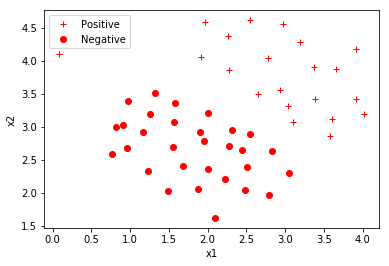

In [132]:
#METHOD 1 (Best One)


neg = X[np.where(Y == 0)[0]] # or neg = X[np.argwhere(Y == 0)]



pos = X[np.where(Y == 1)[0]] # or pos = X[np.argwhere(Y == 1)]


plt.plot(pos[:,0],pos[:,1],'r+',label = 'Positive')
plt.plot(neg[:,0],neg[:,1],'ro',label = 'Negative')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
neg.shape

In [133]:
neg

array([[1.5841 , 3.3575 ],
       [2.0103 , 3.2039 ],
       [1.9527 , 2.7843 ],
       [2.2753 , 2.7127 ],
       [2.3099 , 2.9584 ],
       [2.8283 , 2.6309 ],
       [3.0473 , 2.2931 ],
       [2.4827 , 2.0373 ],
       [2.5057 , 2.3853 ],
       [1.8721 , 2.0577 ],
       [2.0103 , 2.3546 ],
       [1.2269 , 2.3239 ],
       [1.8951 , 2.9174 ],
       [1.561  , 3.0709 ],
       [1.5495 , 2.6923 ],
       [1.6878 , 2.4057 ],
       [1.4919 , 2.0271 ],
       [0.962  , 2.682  ],
       [1.1693 , 2.9276 ],
       [0.8122 , 2.9992 ],
       [0.9735 , 3.3881 ],
       [1.25   , 3.1937 ],
       [1.3191 , 3.5109 ],
       [2.2292 , 2.201  ],
       [2.4482 , 2.6411 ],
       [2.7938 , 1.9656 ],
       [2.091  , 1.6177 ],
       [2.5403 , 2.8867 ],
       [0.9044 , 3.0198 ],
       [0.76615, 2.5899 ]])

(30, 2)

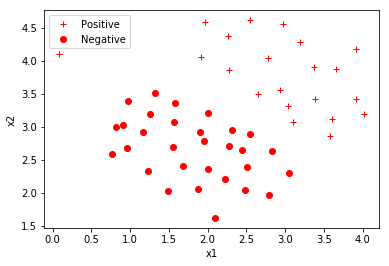

In [134]:
#METHOD 2

temp = np.concatenate((Y == 0,Y == 0),axis = 1)

neg= X[temp].reshape(30,2)

temp = np.concatenate((Y == 1,Y == 1),axis = 1)

pos = X[temp].reshape(21,2)

plt.plot(pos[:,0],pos[:,1],'r+',label = 'Positive')
plt.plot(neg[:,0],neg[:,1],'ro',label = 'Negative')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
neg.shape

Text(0,0.5,'x2')

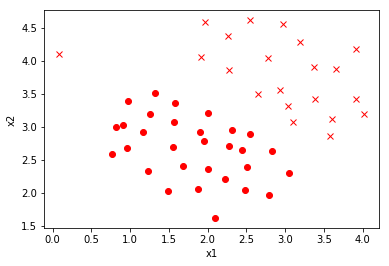

In [135]:
#Method 3 (Using for loop)
for i in range(m):
    
    if Y[i] == 1:
        plt.plot(X[i,0],X[i,1],'rx')
        
    else:
        plt.plot(X[i,0],X[i,1],'ro')
        
plt.xlabel('x1')
plt.ylabel('x2')


#### Training the SVM(linear) using sklearn



In [136]:
#importing LinearSVC function which will learn parameters with no kernel(linear kernel)
from sklearn.svm import LinearSVC

#Training at C = 1 (also for C = 100 change value for C)
svm  = LinearSVC(C = 100) # Now we get an object having name svm who knows how to train on linear kernel

print(svm)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [137]:
svm.fit(X,Y.flatten()) # Fitting our training data Y.flatten() is send it as a vector

print('Intercept : ',svm.intercept_)
print('Coefficient : ',svm.coef_)

Intercept :  [-11.48325946]
Coefficient :  [[1.09490684 2.79068808]]


In [138]:

# Making theta from intercept(theta[0]) and Coefficients(theta[1],theta[2])
theta = np.array([svm.intercept_,svm.coef_[0][0],svm.coef_[0][1]]).reshape(3,1)
theta.shape

(3, 1)

##### Plotting the Decision Boundary

(30, 2)

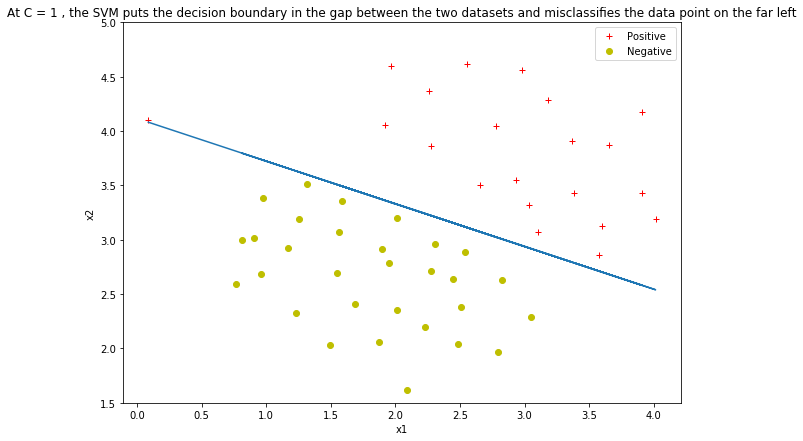

In [139]:
#METHOD 1 (Best One)
plt.figure(figsize=(10,7))

neg = X[np.where(Y == 0)[0]] # or neg = X[np.argwhere(Y == 0)]
pos = X[np.where(Y == 1)[0]] # or pos = X[np.argwhere(Y == 1)]

plt.title('At C = 1 , the SVM puts the decision boundary in the gap between the two datasets and misclassiﬁes the data point on the far left')

# plotting the data set
plt.plot(pos[:,0],pos[:,1],'r+',label = 'Positive')
plt.plot(neg[:,0],neg[:,1],'yo',label = 'Negative')

#plotting the decision boundary i.e, theta[0] + theta[1]x1 + theta[2]x2 = 0 =>  x2 = (theta[0] + theta[1]x1) / theta[2]
plt.plot(X[:,0],-(theta[0] + theta[1]*X[:,0])/theta[2])

plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim(1.5,5)

plt.legend()
neg.shape

## 1.2 SVM with Gaussian Kernels

### 1.2.1 Gaussian Kernel

In [140]:
def gaussianKernel(x1,x2,sigma):
    
    #Returns the gaussian kernel the 2 array passed
    return np.exp(-((x1 - x2)**2).sum()/(2*(sigma**2)))

In [141]:
#defining variables
x1 = np.array([1 ,2 ,1])
x2 = np.array([0,4,-1])
sigma = 2

# calling the function
sim = gaussianKernel(x1, x2, sigma);

sim

0.32465246735834974

### Visualizing the Dataset 2

In [142]:
##VISUALIZING THE DATASET 2
data2 = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex6\ex6\ex6data2.mat')


In [143]:
#Extracting the data2

# Training Set
X2 = data2['X']
Y2 = data2['y']

m2,n2 = X2.shape

print(X2.shape)
print(Y2.shape)

(863, 2)
(863, 1)


(30, 2)

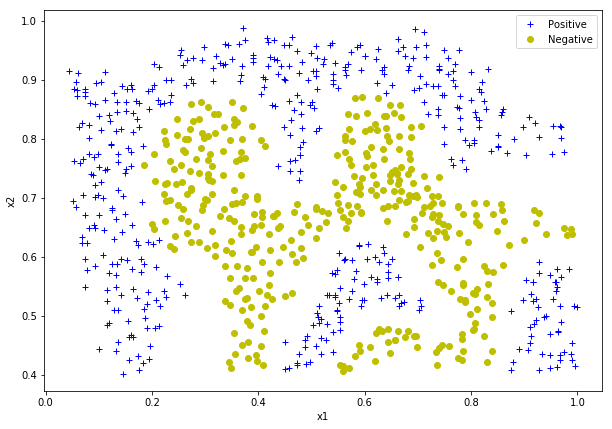

In [144]:
#METHOD 1 (Best One)


neg2 = X2[np.where(Y2 == 0)[0]] # or neg = X[np.argwhere(Y == 0)]
pos2 = X2[np.where(Y2 == 1)[0]] # or pos = X[np.argwhere(Y == 1)]

plt.figure(figsize=(10,7))

plt.plot(pos2[:,0],pos2[:,1],'b+',label = 'Positive')
plt.plot(neg2[:,0],neg2[:,1],'yo',label = 'Negative')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
neg.shape

In [145]:
#It will return the matrix of features
def gaussianKernelMatrix(X1,X2,sigma):
    
    """X1 is jiski hme features nikalne hai train krte tym to ye training X hoga or jb predict krenge to ye input hoga
        jisk hum feature matrix bnayenge on the basis of X2(which is our training data)
        train krte tym feature matrix ka size hoga : (m of training data ,m of training data) i.e, for this (863,863)
        prediction krte tym feature matrix ka size hoga : (m of input data ,m of training data)
        """
    
    gramMatrix = np.zeros((X1.shape[0],X2.shape[0])) # Initialized with zeros on the basis of its size
    
    for i,x1 in enumerate(X1): # i is the index and x1 is the element at that index
        
        for j,x2 in enumerate(X2):
            
            gramMatrix[i,j] = gaussianKernel(x1,x2,sigma)
    
    #print('Feature matrix shape : ',gramMatrix.shape)
    return gramMatrix

In [146]:
print(X2.shape)

(863, 2)


In [147]:
#Performing the gaussian kernel

from sklearn import svm
C = 1
sigma = 0.1
clf = svm.SVC(C = C, kernel="precomputed") # kernel="precomputed" tells here that we are using our own computed kernel

clf.fit(gaussianKernelMatrix(X2,X2,sigma), Y2.flatten()) # fit krte time hum apne gaussianKernelMatrix() ko call kr ke
                                                         # feature matrix pass krenge




SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [148]:
#plotting the graph here
def plotDecisionBoundary(X,Y,sigma):
    plt.figure(figsize=(10,7))

    #linearly spaced elements are taken b/w minimum and maximum elements of the two features
    x1plot = np.linspace(X[:,0].min(),X[:,0].max(),100)
    x2plot = np.linspace(X[:,1].min(),X[:,1].max(),100)

    neg = X[np.where(Y == 0)[0]] # or neg = X[np.argwhere(Y == 0)]
    pos = X[np.where(Y == 1)[0]]

    #Plotting our data
    plt.plot(pos[:,0],pos[:,1],'b+',label = 'Positive')
    plt.plot(neg[:,0],neg[:,1],'ro',label = 'Negative')

    t1,t2 = np.meshgrid(x1plot,x2plot)

    vals = np.zeros((t1.shape[0],t2.shape[0]))

    for i in range(len(t1)):

        #taking columns from t1 and t2(corresponding) which will be treated as input
        temp = np.concatenate((t1[:,i].reshape(len(t1),1),t2[:,i].reshape(len(t2),1)),axis = 1)

        """temp is jiski hme features nikalne k bad us se predict krna h ye ek trah se hmara  unknown data jispe predict 
           krna hai temp ki hum feature matrix bnayenge on the basis of X2(which is our training data)
            train krte tym feature matrix ka size hoga : (m of training data ,m of training data) i.e, for this (863,863)
            prediction krte tym feature matrix ka size hoga : (m of input data ,m of training data)
            """
        vals[:,i] = clf.predict(gaussianKernelMatrix(temp,X,sigma))

    plt.contour(t1,t2,vals,linewidths = .3,colors = 'g')
    plt.legend()
    plt.show()

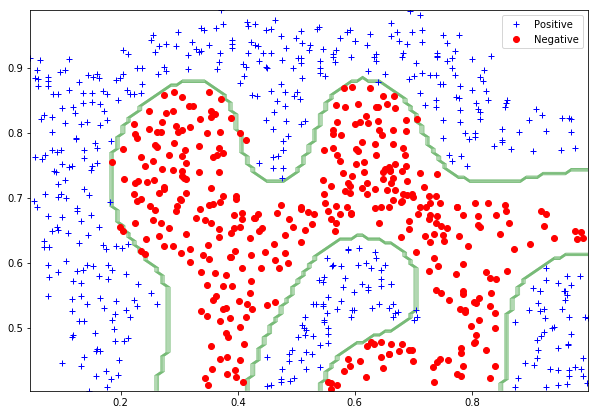

In [149]:
plotDecisionBoundary(X2,Y2,sigma)

### Visualizing the Dataset 3

In [150]:
##VISUALIZING THE DATASET 2
data3 = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex6\ex6\ex6data3.mat')


In [151]:
data3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [152]:
#Extracting the data3
X3 = data3['X']
Y3 = data3['y']

Xval3 = data3['Xval']
Yval3 = data3['yval']

(30, 2)

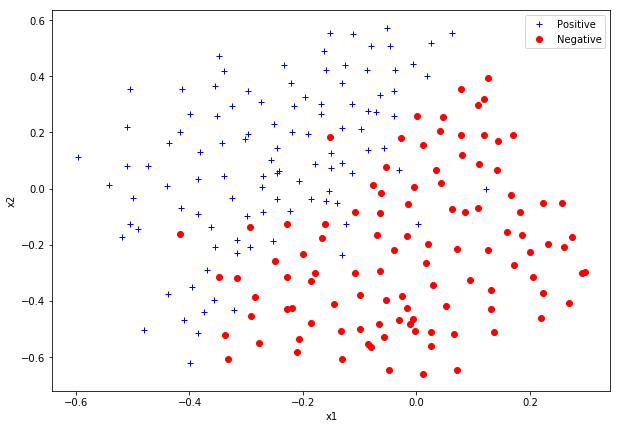

In [153]:
#Plotting the data

#METHOD 1 (Best One)


neg3 = X3[np.where(Y3 == 0)[0]] # or neg = X[np.argwhere(Y == 0)]
pos3 = X3[np.where(Y3 == 1)[0]] # or pos = X[np.argwhere(Y == 1)]

plt.figure(figsize=(10,7))

plt.plot(pos3[:,0],pos3[:,1],'b+',label = 'Positive')
plt.plot(neg3[:,0],neg3[:,1],'ro',label = 'Negative')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
neg.shape

In [154]:
X3.shape


(211, 2)

In [155]:
#now we will find the optimal value of C and sigma by training with cross validation(Xval) set and then train the final
# training data(X) with finalized C and sigma

#This function will return the final optimal value of C and sigma
def dataset3Params(X3, Y3, Xval3, Yval3):
    
    # we will test the C and sigma from this set(every combination of C and sigma) and chose that will give the lowest
    #prediction error on cross validation set
    tempParams =[ 0.01,0.03,0.1,0.3,1,3,10,30]
    
    #It will track the minimum predictions error 
    minError = math.inf
    
    #Initializing finalized C and Sigma
    finalC = 0
    finalSigma = 0
    
    #taking every C from the set
    for C in tempParams:
        
        #taking sigma 
        for sigma in tempParams:
            
            #now we have all combinations of C and sigma through these two loops
            
            #NOW TRAINING THE CROSS VALIDATION SET WITH EVERY PAIR OF C AND Sigma
            clf = svm.SVC(C = C, kernel="precomputed") # kernel="precomputed" tells here that we are using our own computed kernel
            
            #fitting with cross validation set
            clf.fit(gaussianKernelMatrix(Xval3,Xval3,sigma), Yval3.flatten()) # fit krte time hum apne gaussianKernelMatrix() ko call kr ke
            
            #making prediction on the cross validation set
            predictions = clf.predict(gaussianKernelMatrix(Xval3,Xval3,sigma))
            
            # if the prediction errror of current loop is less than the present minError then we will change C and Sigma
            if minError >= (predictions - Yval3).mean():
                
                finalC = C
                finalSigma = sigma
                minError = (predictions - Yval3).mean()
                
            #print(C,sigma,' ',(predictions - Yval3).mean())
            
    return finalC,finalSigma

#Taking the finalized C and Sigma(optimal) computed using the cross validation set
finalC,finalSigma = dataset3Params(X3, Y3, Xval3, Yval3)

In [156]:
print(finalC,finalSigma)

10 0.1


In [157]:
#Now we will train our training data with the finalized C and sigma computed using the cross validation set

clf = svm.SVC(C = finalC, kernel="precomputed") # kernel="precomputed" tells here that we are using our own computed kernel

#Fitting the training data(X) using finalized sigma
clf.fit(gaussianKernelMatrix(X3,X3,finalSigma), Y3.flatten())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

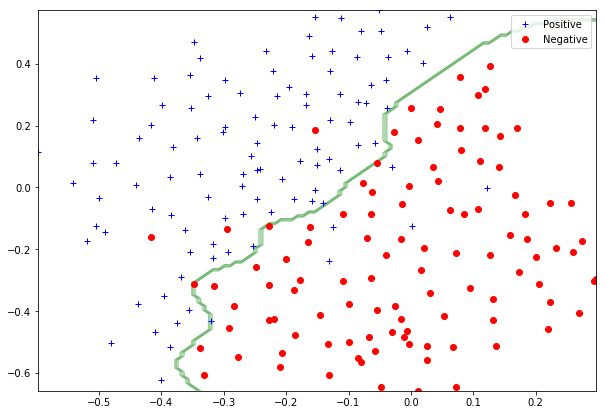

In [159]:
plotDecisionBoundary(X3,Y3,finalSigma)